In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# EDA

## Overview

In [3]:
amsterdam = pd.read_csv("../data/clean/amsterdam.csv")
athens = pd.read_csv("../data/clean/athens.csv")
barcelona = pd.read_csv("../data/clean/barcelona.csv")
berlin = pd.read_csv("../data/clean/berlin.csv")
budapest = pd.read_csv("../data/clean/budapest.csv")
lisbon = pd.read_csv("../data/clean/lisbon.csv")
london = pd.read_csv("../data/clean/london.csv")
paris = pd.read_csv("../data/clean/paris.csv")
rome = pd.read_csv("../data/clean/rome.csv")
vienna = pd.read_csv("../data/clean/vienna.csv")
airbnb = pd.read_csv("../data/clean/airbnb_merged.csv")

In [101]:
airbnb

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,weekend,city
0,194.033698,Private room,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896,False,Amsterdam
1,344.245776,Private room,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757,False,Amsterdam
2,264.101422,Private room,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955,False,Amsterdam
3,433.529398,Private room,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098,False,Amsterdam
4,485.552926,Private room,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740,False,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,438.756874,True,Vienna
51703,304.793960,Entire home/apt,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,342.182813,True,Vienna
51704,637.168969,Entire home/apt,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,282.296424,True,Vienna
51705,301.054157,Private room,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,158.563398,True,Vienna


In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   person_capacity             51707 non-null  float64
 3   host_is_superhost           51707 non-null  bool   
 4   multi                       51707 non-null  int64  
 5   biz                         51707 non-null  int64  
 6   cleanliness_rating          51707 non-null  float64
 7   guest_satisfaction_overall  51707 non-null  float64
 8   bedrooms                    51707 non-null  int64  
 9   dist                        51707 non-null  float64
 10  metro_dist                  51707 non-null  float64
 11  attr_index                  51707 non-null  float64
 12  rest_index                  51707 non-null  float64
 13  weekend                     517

In [98]:
airbnb.isnull().sum()

realSum                       0
room_type                     0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
rest_index                    0
weekend                       0
city                          0
dtype: int64

## Univariate

(0.0, 5000.0)

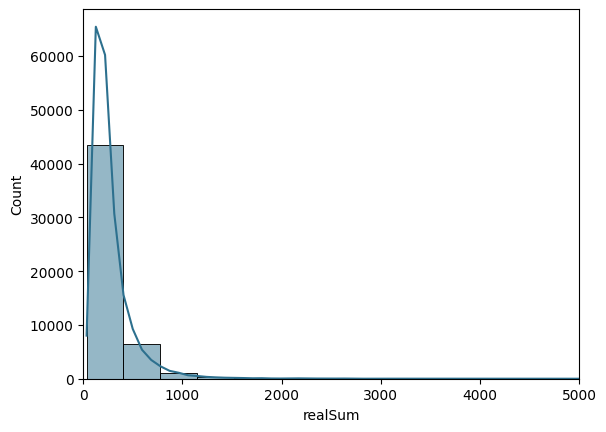

In [126]:
sns.histplot(airbnb['realSum'], kde=True, bins=50, color="#2D708EFF");
#plt.savefig("../figures/univariate_realSum.png", dpi=300, bbox_inches="tight")
plt.xlim(0,5000)

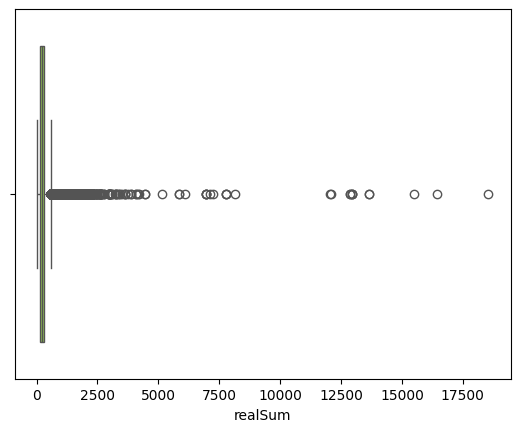

In [127]:
sns.boxplot(x = airbnb['realSum'], color="#95D840FF");
#plt.savefig("../figures/univariate_realSum_boxplot.png", dpi=300, bbox_inches="tight")

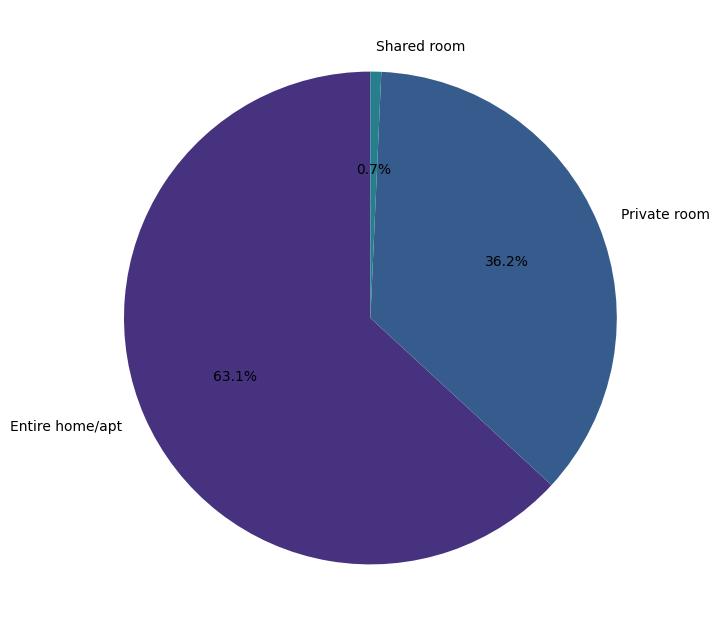

In [152]:
plt.figure(figsize=(10, 8))
airbnb['room_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis"));
plt.ylabel('')
# plt.savefig("../figures/univariate_roomtype.png", dpi=300, bbox_inches="tight")

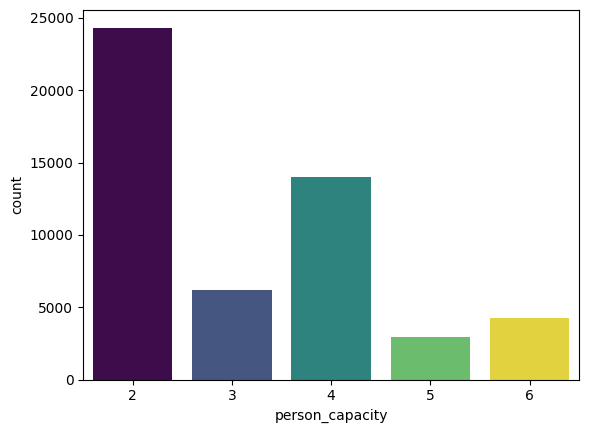

In [129]:
airbnb["person_capacity"] = airbnb["person_capacity"].astype(int)
sns.countplot(data=airbnb, x='person_capacity', palette="viridis", hue='person_capacity', legend=False);
# plt.savefig("../figures/univariate_capacity.png", dpi=300, bbox_inches="tight")

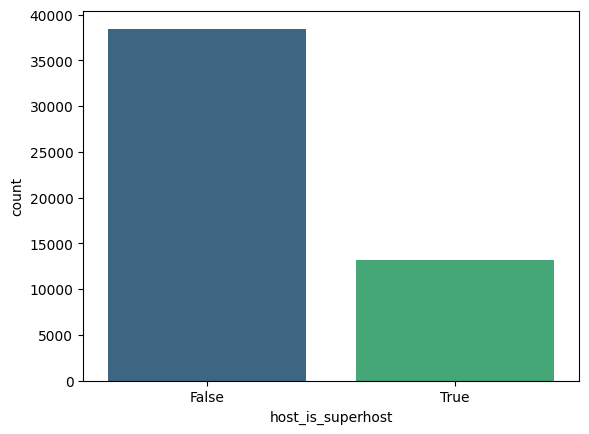

In [130]:
sns.countplot(data=airbnb, x='host_is_superhost', palette="viridis", hue='host_is_superhost', legend=False);
# plt.savefig("../figures/univariate_superhost.png", dpi=300, bbox_inches="tight")

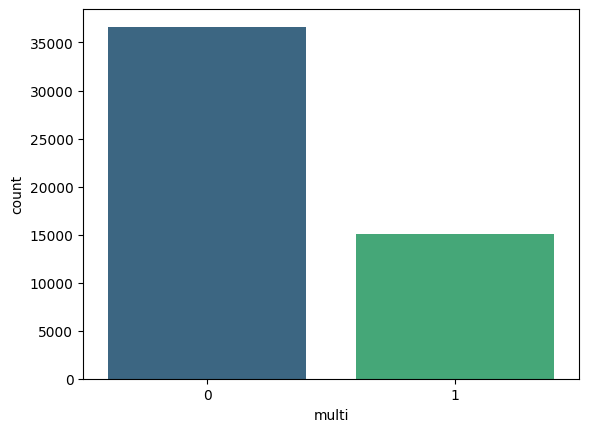

In [131]:
sns.countplot(data=airbnb, x='multi', palette="viridis", hue='multi', legend=False);
# plt.savefig("../figures/univariate_multi.png", dpi=300, bbox_inches="tight")

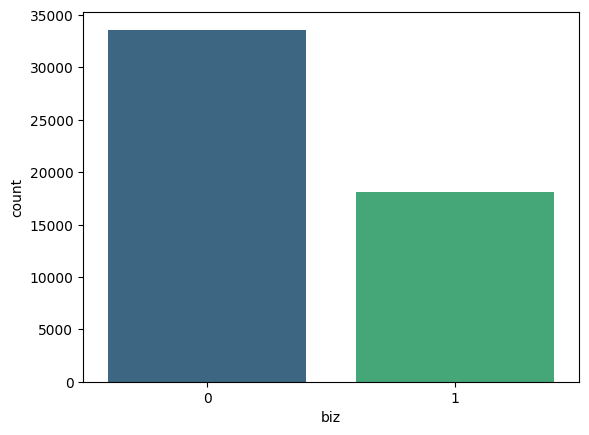

In [132]:
sns.countplot(data=airbnb, x='biz', palette="viridis", hue='biz', legend=False);
# plt.savefig("../figures/univariate_biz.png", dpi=300, bbox_inches="tight")

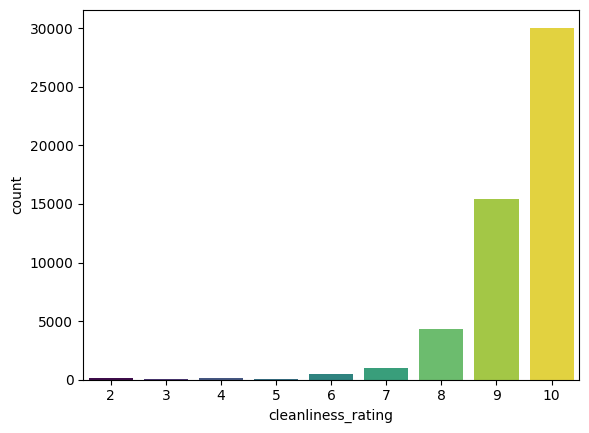

In [133]:
airbnb["cleanliness_rating"] = airbnb["cleanliness_rating"].astype(int)
sns.countplot(data=airbnb, x='cleanliness_rating', palette="viridis", hue='cleanliness_rating', legend=False);
# plt.savefig("../figures/univariate_cleanliness.png", dpi=300, bbox_inches="tight")

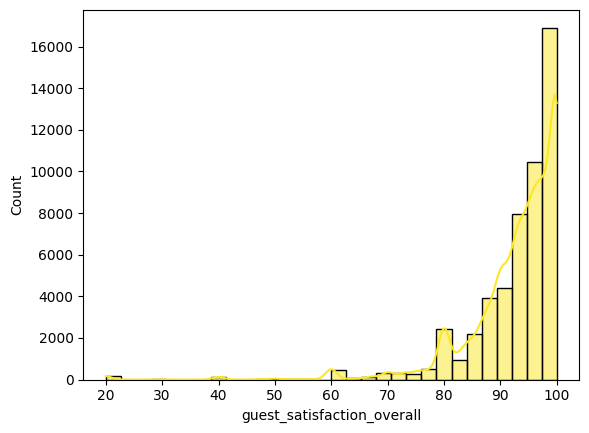

In [134]:
sns.histplot(airbnb['guest_satisfaction_overall'], kde=True, bins=30, color="#FDE725FF");
# plt.savefig("../figures/univariate_overallsatisfaction.png", dpi=300, bbox_inches="tight")

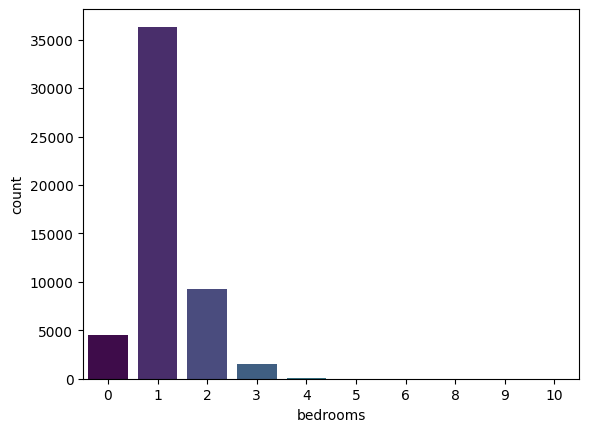

In [135]:
sns.countplot(data=airbnb, x='bedrooms', palette="viridis", hue='bedrooms', legend=False);
# plt.savefig("../figures/univariate_bedrooms.png", dpi=300, bbox_inches="tight")

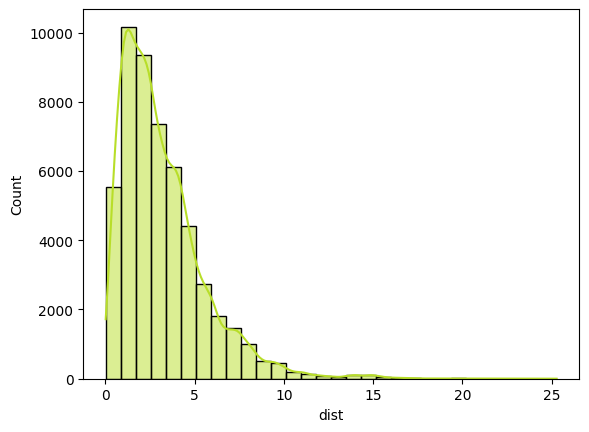

In [136]:
sns.histplot(airbnb['dist'], kde=True, bins=30, color="#B8DE29FF");
# plt.savefig("../figures/univariate_dist.png", dpi=300, bbox_inches="tight")

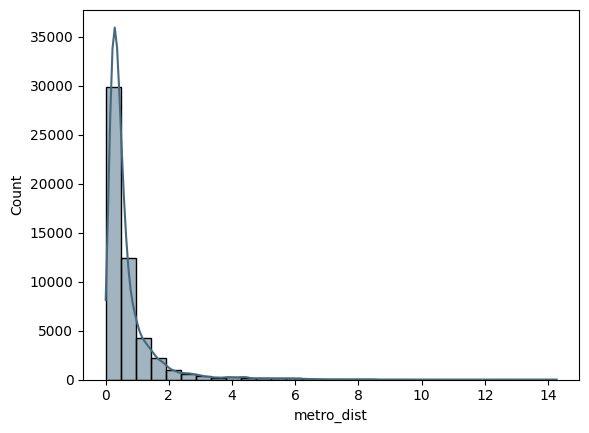

In [137]:
sns.histplot(airbnb['metro_dist'], kde=True, bins=30, color="#456a80");
# plt.savefig("../figures/univariate_metrodist.png", dpi=300, bbox_inches="tight")

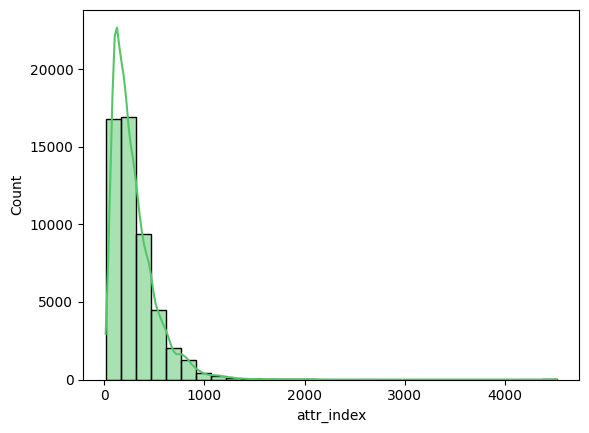

In [138]:
sns.histplot(airbnb['attr_index'], kde=True, bins=30, color="#55C667FF");
# plt.savefig("../figures/univariate_attrindex.png", dpi=300, bbox_inches="tight")

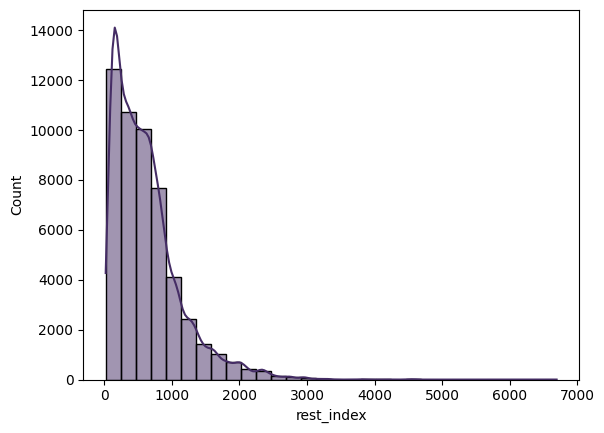

In [139]:
sns.histplot(airbnb['rest_index'], kde=True, bins=30, color="#452d65");
# plt.savefig("../figures/univariate_restindex.png", dpi=300, bbox_inches="tight")

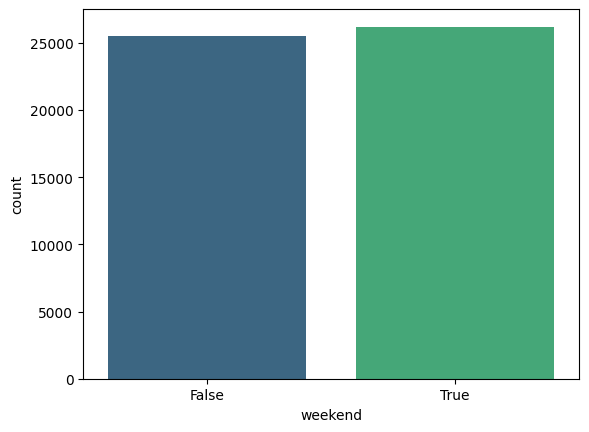

In [140]:
sns.countplot(data=airbnb, x='weekend', palette="viridis", hue='weekend', legend=False);
# plt.savefig("../figures/univariate_weekend.png", dpi=300, bbox_inches="tight")

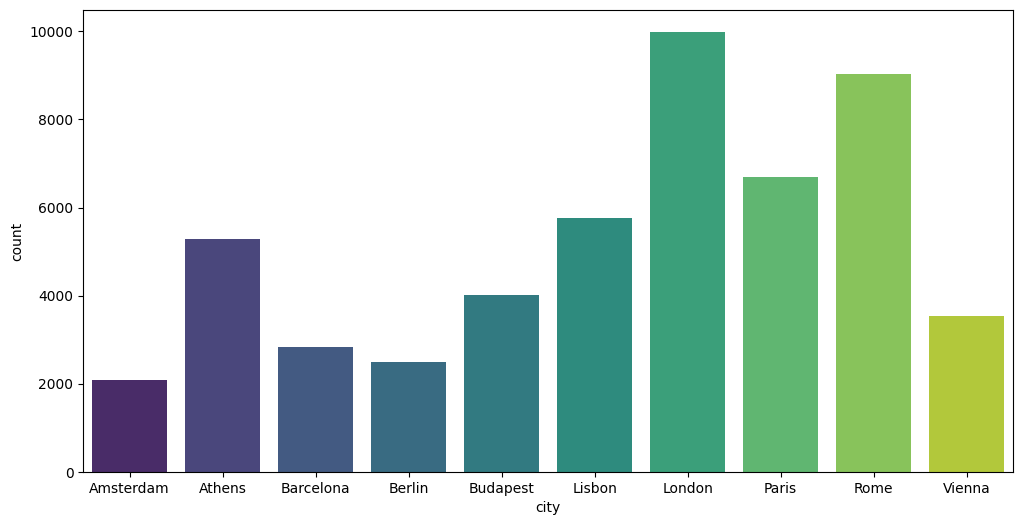

In [141]:
plt.figure(figsize=(12,6)) 
sns.countplot(data=airbnb, x='city', palette="viridis", hue='city', legend=False)
# plt.savefig("../figures/univariate_city.png", dpi=300, bbox_inches="tight")

## Bivariate Price

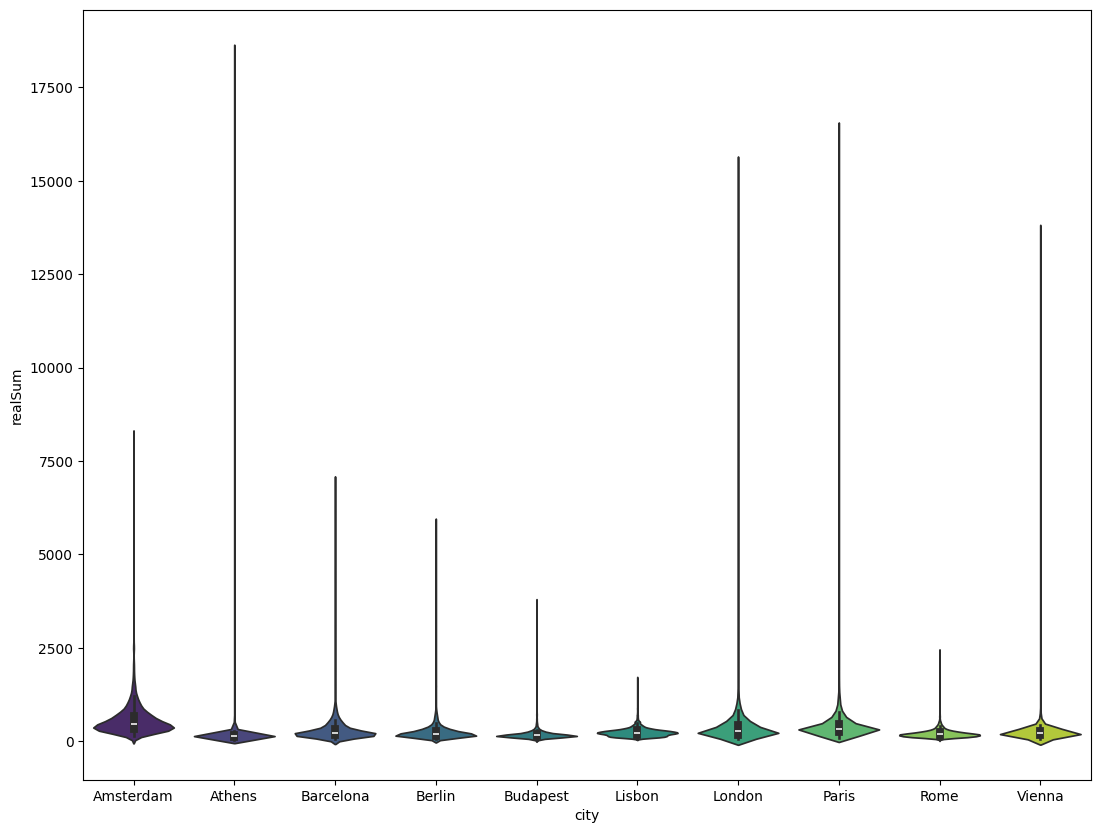

In [203]:
plt.figure(figsize=(13, 10))
sns.violinplot(data=airbnb, x='city', y='realSum', palette="viridis", hue='city', legend=False)
#plt.savefig("../figures/bivariate_violin_price_city.png", dpi=300, bbox_inches="tight")
plt.show()

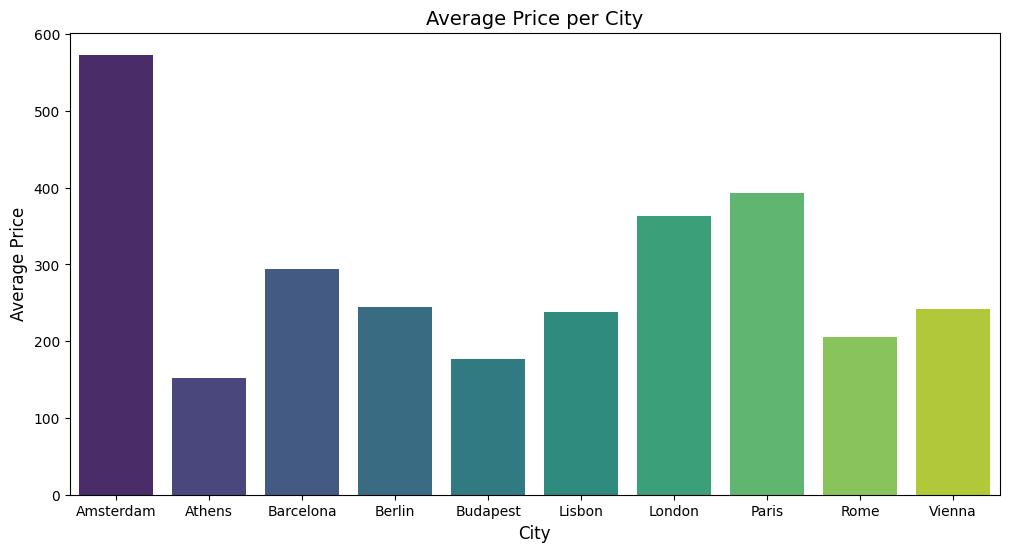

In [204]:

city_average = airbnb.groupby("city")[["realSum"]].mean()

plt.figure(figsize=(12,6))  
sns.barplot(data=city_average, x="city", y="realSum", hue = "city", palette="viridis")
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.title("Average Price per City", fontsize=14)
#plt.savefig("../figures/bivariate_bar_price_city.png", dpi=300, bbox_inches="tight")
plt.show()


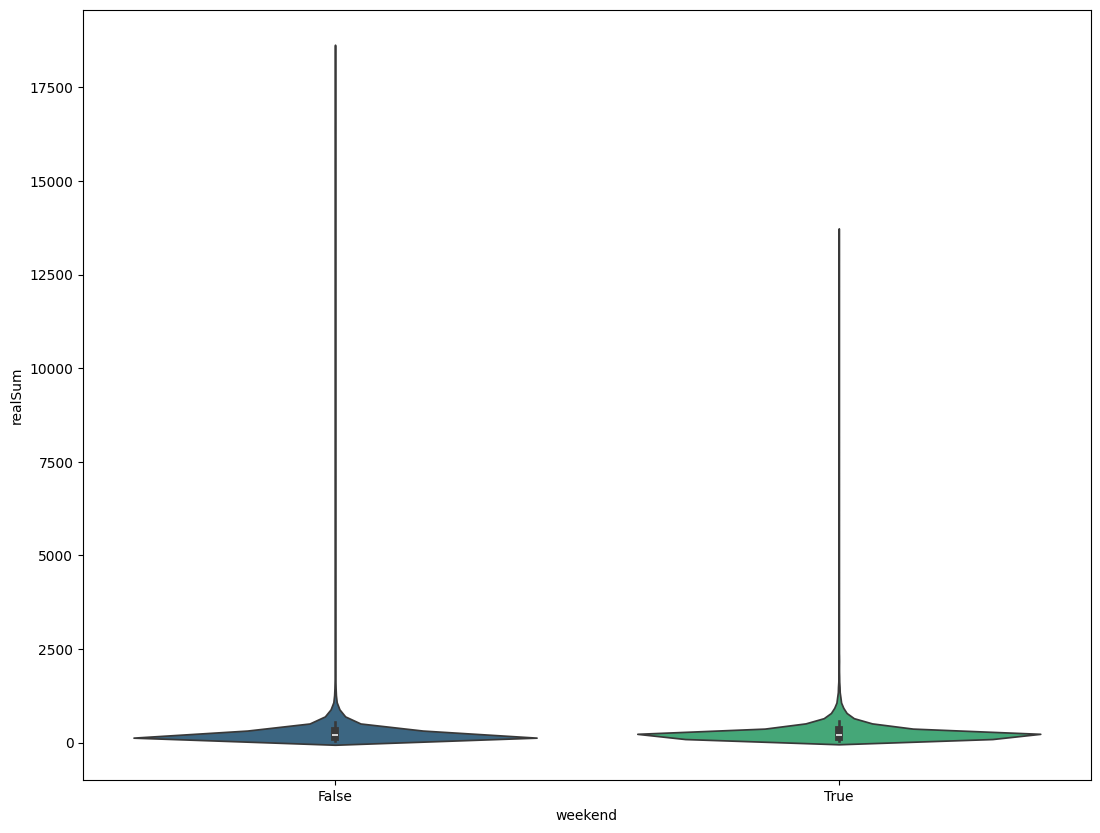

In [205]:

plt.figure(figsize=(13, 10))
sns.violinplot(data=airbnb, x='weekend', y='realSum', palette="viridis", hue='weekend', legend=False)
#plt.savefig("../figures/bivariate_violin_price_weekend.png", dpi=300, bbox_inches="tight")
plt.show()


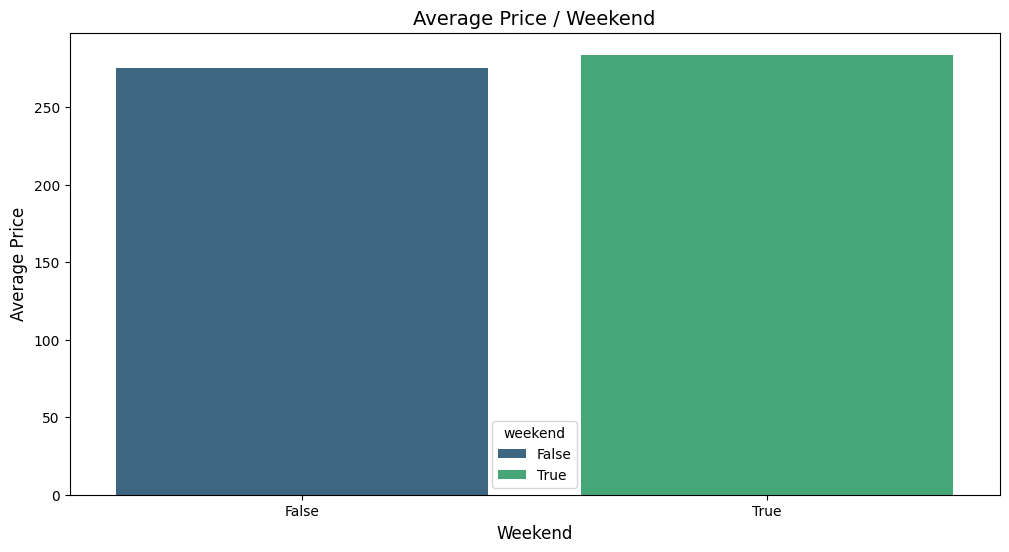

In [206]:
weekend_average = airbnb.groupby("weekend")[["realSum"]].mean()

plt.figure(figsize=(12,6))  
sns.barplot(data=weekend_average, x="weekend", y="realSum", hue = "weekend", palette="viridis")
plt.xlabel("Weekend", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.title("Average Price / Weekend", fontsize=14)
#plt.savefig("../figures/bivariate_bar_price_weekend.png", dpi=300, bbox_inches="tight")
plt.show()

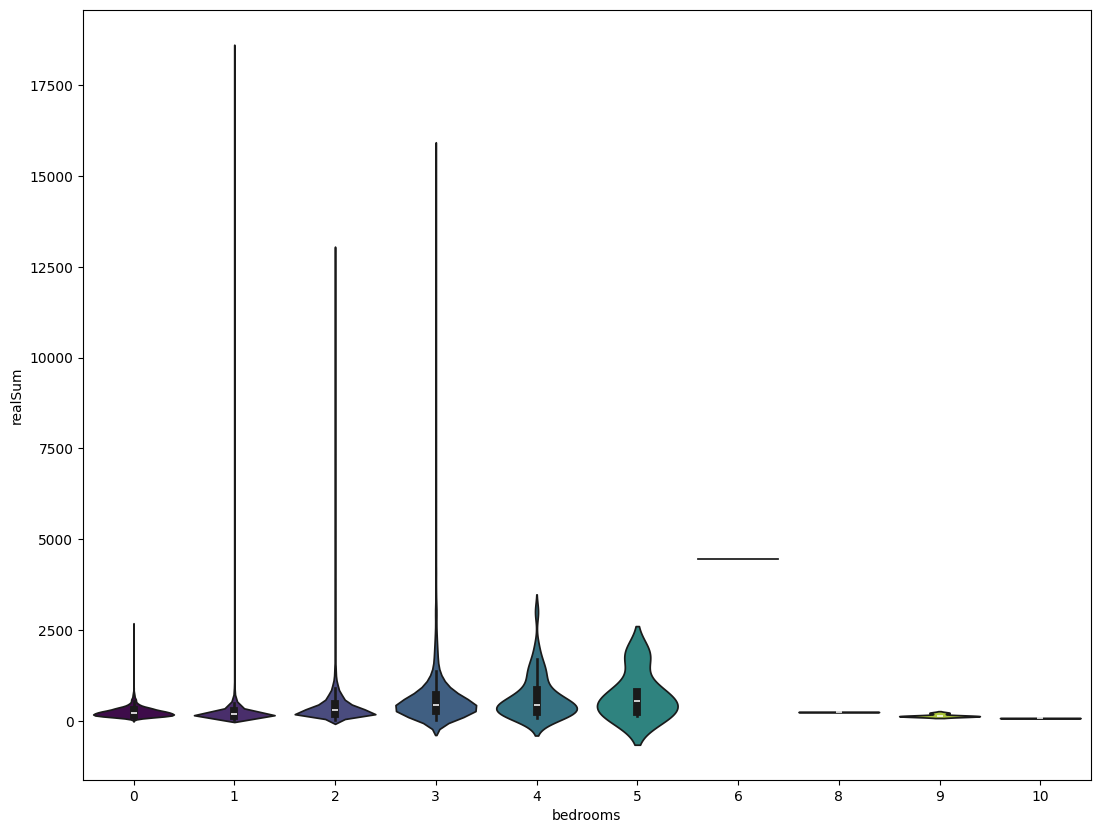

In [207]:
plt.figure(figsize=(13, 10))
sns.violinplot(data=airbnb, x='bedrooms', y='realSum', palette="viridis", hue='bedrooms', legend=False)
#plt.savefig("../figures/bivariate_violin_price_bedrooms.png", dpi=300, bbox_inches="tight")
plt.show()


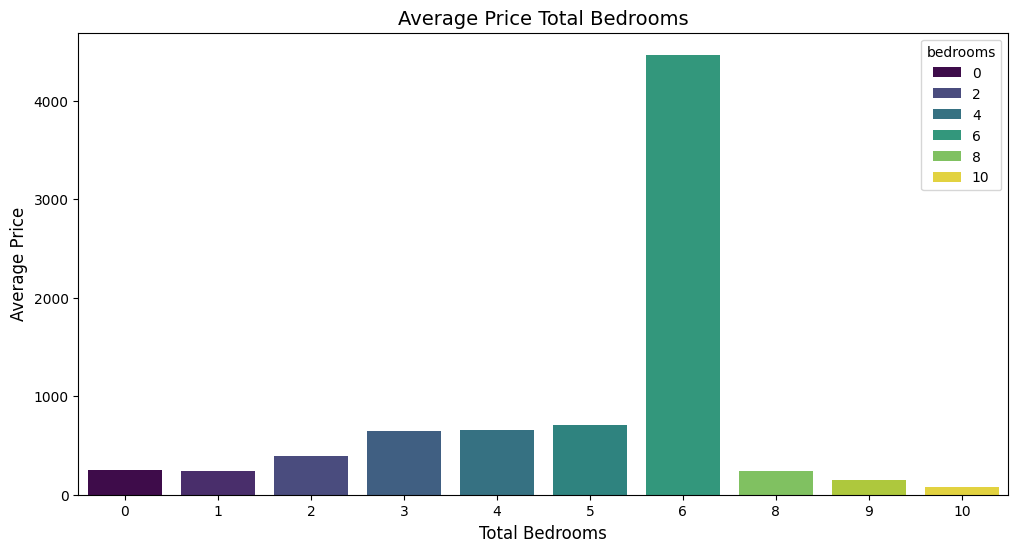

In [208]:
bedrooms_average = airbnb.groupby("bedrooms")[["realSum"]].mean()

plt.figure(figsize=(12,6))  
sns.barplot(data=bedrooms_average, x="bedrooms", y="realSum", hue = "bedrooms", palette="viridis")
plt.xlabel("Total Bedrooms", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.title("Average Price Total Bedrooms", fontsize=14)
#plt.savefig("../figures/bivariate_bar_price_bedrooms.png", dpi=300, bbox_inches="tight")
plt.show()


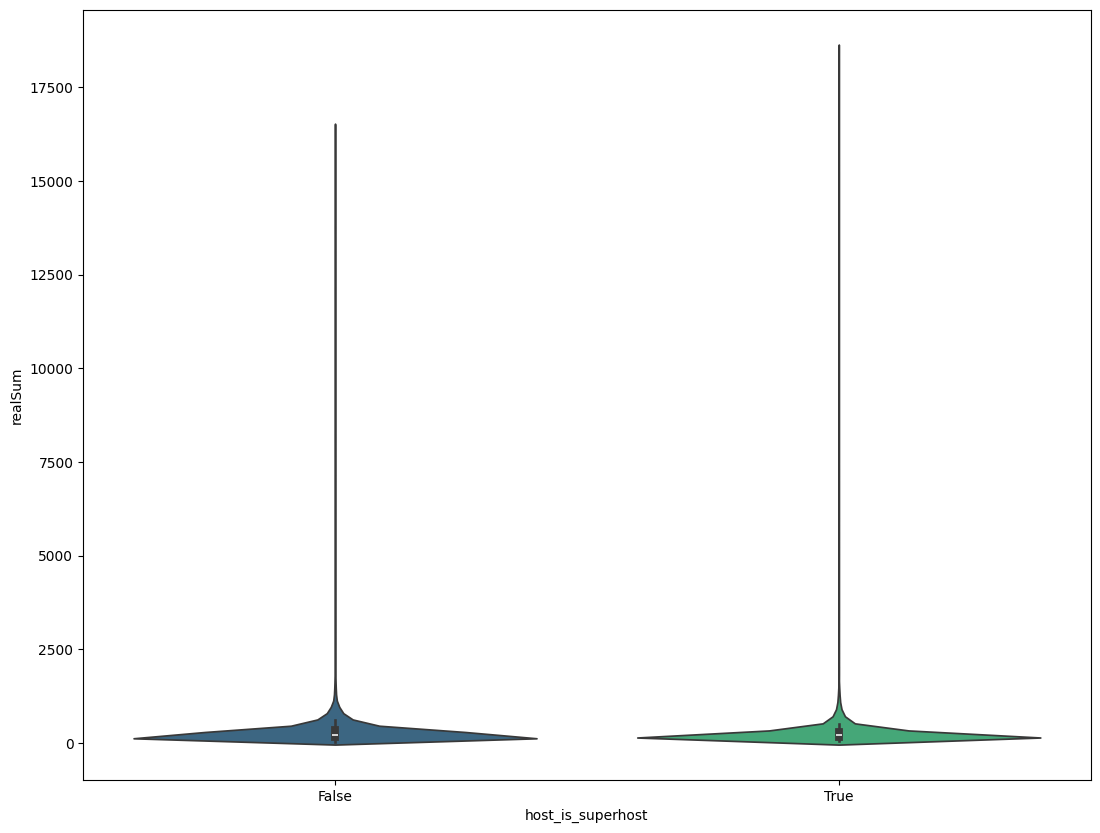

In [209]:
plt.figure(figsize=(13, 10))
sns.violinplot(data=airbnb, x='host_is_superhost', y='realSum', palette="viridis", hue='host_is_superhost', legend=False)
#plt.savefig("../figures/bivariate_violin_price_superhost.png", dpi=300, bbox_inches="tight")
plt.show()


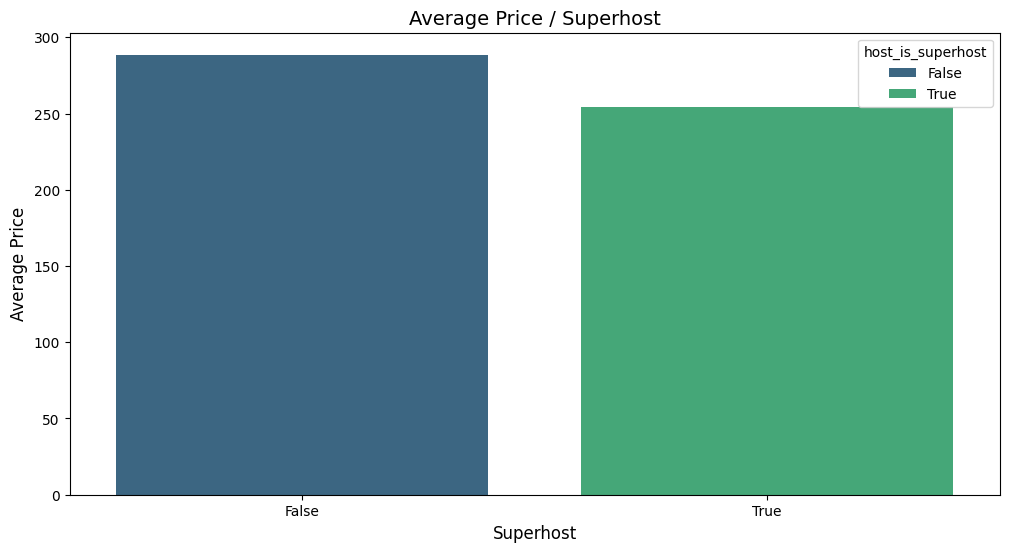

In [210]:
host_is_superhost_average = airbnb.groupby("host_is_superhost")[["realSum"]].mean()

plt.figure(figsize=(12,6))  
sns.barplot(data=host_is_superhost_average, x="host_is_superhost", y="realSum", hue = "host_is_superhost", palette="viridis")
plt.xlabel("Superhost", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.title("Average Price / Superhost", fontsize=14)
#plt.savefig("../figures/bivariate_bar_price_superhost.png", dpi=300, bbox_inches="tight")
plt.show()


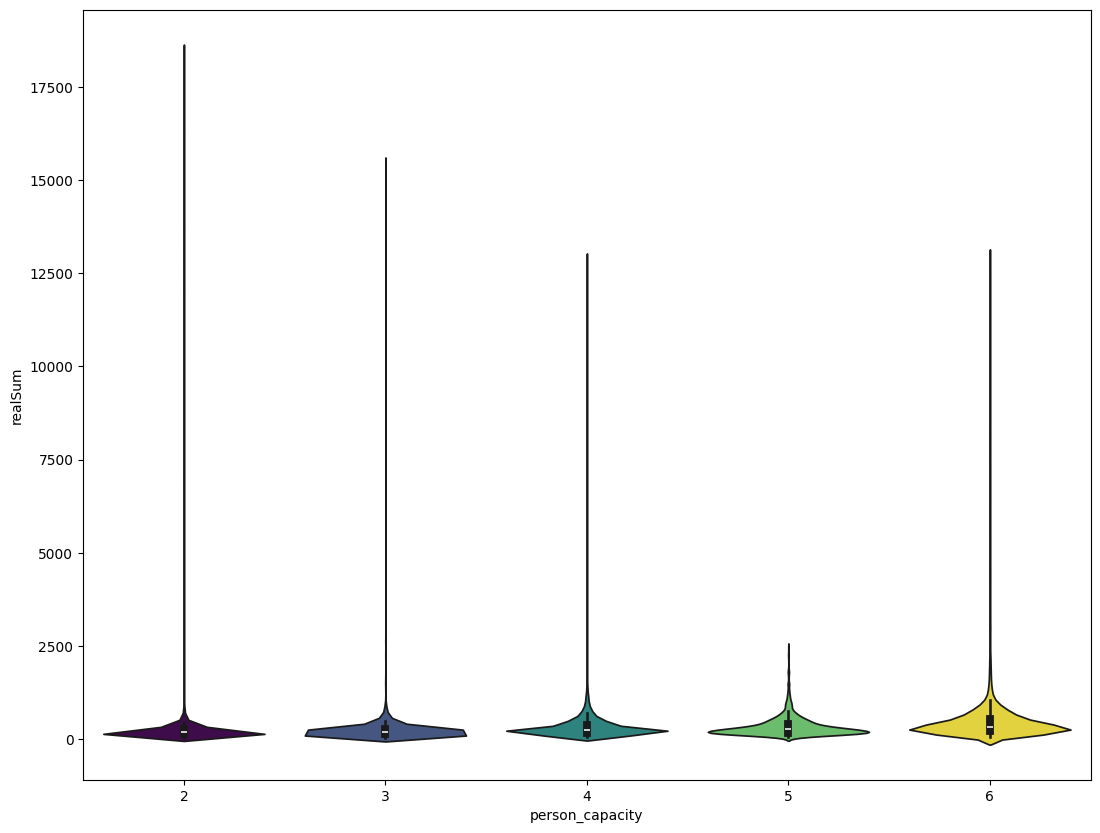

In [9]:
airbnb["person_capacity"] = airbnb["person_capacity"].astype(int)
plt.figure(figsize=(13, 10))
sns.violinplot(data=airbnb, x='person_capacity', y='realSum', palette="viridis", hue='person_capacity', legend=False)
#plt.savefig("../figures/bivariate_violin_price_capacity.png", dpi=300, bbox_inches="tight")
plt.show()


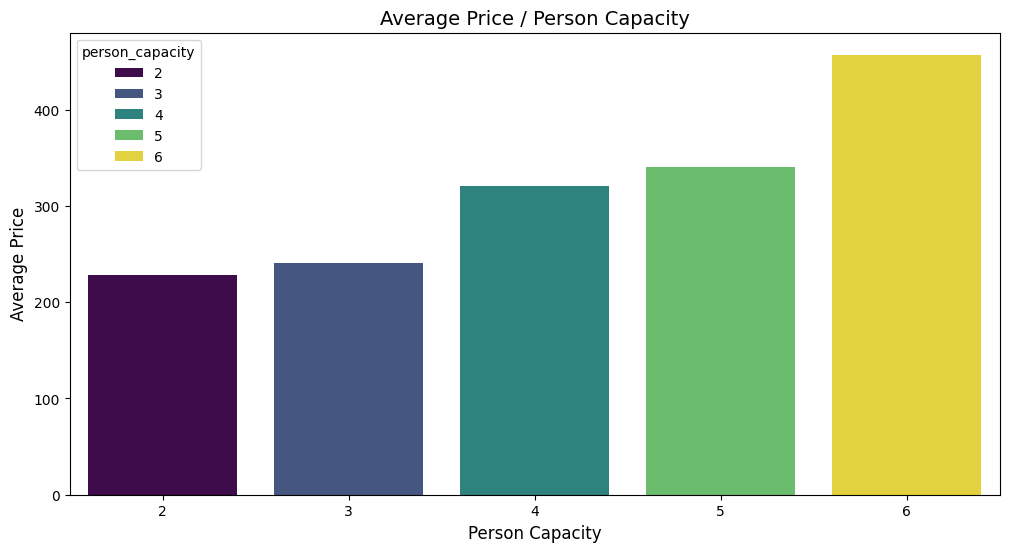

In [7]:
person_capacity_average = airbnb.groupby("person_capacity")[["realSum"]].mean()

plt.figure(figsize=(12,6))  
sns.barplot(data=person_capacity_average, x="person_capacity", y="realSum", hue = "person_capacity", palette="viridis")
plt.xlabel("Person Capacity", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.title("Average Price / Person Capacity", fontsize=14)
#plt.savefig("../figures/bivariate_bar_price_capacity.png", dpi=300, bbox_inches="tight")
plt.show()


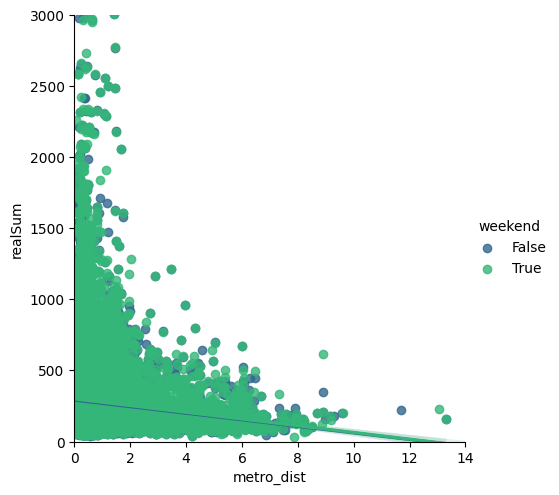

In [21]:
sns.lmplot(data=airbnb,
           x='metro_dist',
           y='realSum',
           hue='weekend',
          palette = 'viridis')

plt.ylim(0, 3000) 
plt.xlim(0,14)
#plt.savefig("../figures/bivariate_scatter_price_metrodist.png", dpi=300, bbox_inches="tight")
plt.show()


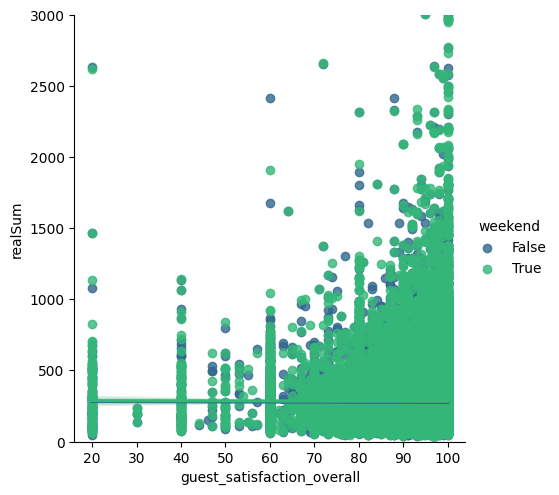

In [214]:
sns.lmplot(data=airbnb,
           x='guest_satisfaction_overall',
           y='realSum',
           hue='weekend',
          palette = 'viridis')

plt.ylim(0, 3000)  
#plt.savefig("../figures/bivariate_scatter_price_overallsatisfaction.png", dpi=300, bbox_inches="tight")
plt.show()

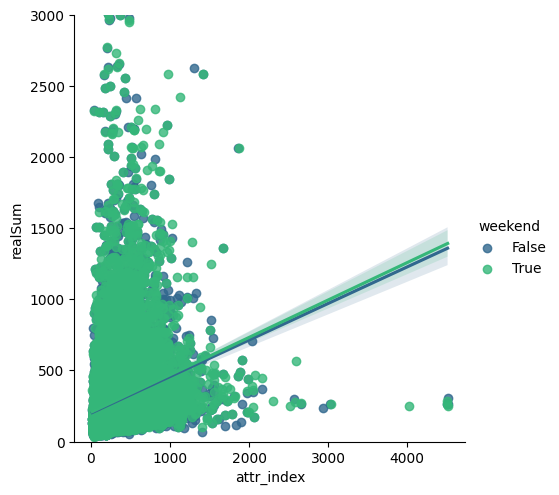

In [215]:
sns.lmplot(data=airbnb,
           x='attr_index',
           y='realSum',
           hue='weekend',
          palette = 'viridis')

plt.ylim(0, 3000)  
#plt.savefig("../figures/bivariate_scatter_price_attrindex.png", dpi=300, bbox_inches="tight")
plt.show()

## Bivariate Client Satisfaction 

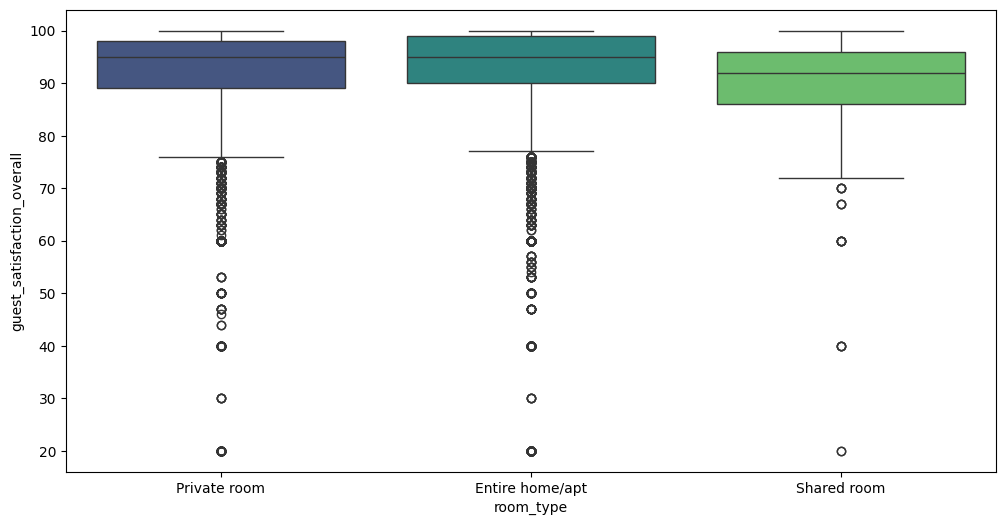

In [216]:
plt.figure(figsize=(12,6)) 
sns.boxplot(data=airbnb, x='room_type', y='guest_satisfaction_overall', palette="viridis", hue='room_type', legend=False);
#plt.savefig("../figures/bivariate_box_satisfaction_roomtype.png", dpi=300, bbox_inches="tight")
plt.show()


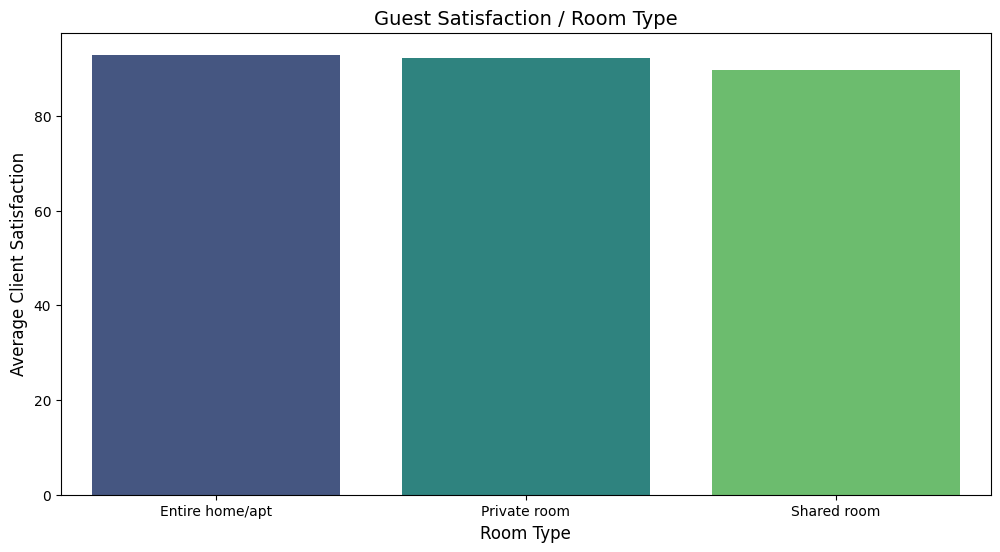

In [217]:
client_satisfaction_roomtype = airbnb.groupby("room_type")[["guest_satisfaction_overall"]].mean()

plt.figure(figsize=(12,6))  
sns.barplot(data=client_satisfaction_roomtype, x="room_type", y="guest_satisfaction_overall", hue = "room_type", palette="viridis")
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Average Client Satisfaction", fontsize=12)
plt.title("Guest Satisfaction / Room Type", fontsize=14)
#plt.savefig("../figures/bivariate_bar_satisfaction_roomtype.png", dpi=300, bbox_inches="tight")
plt.show()


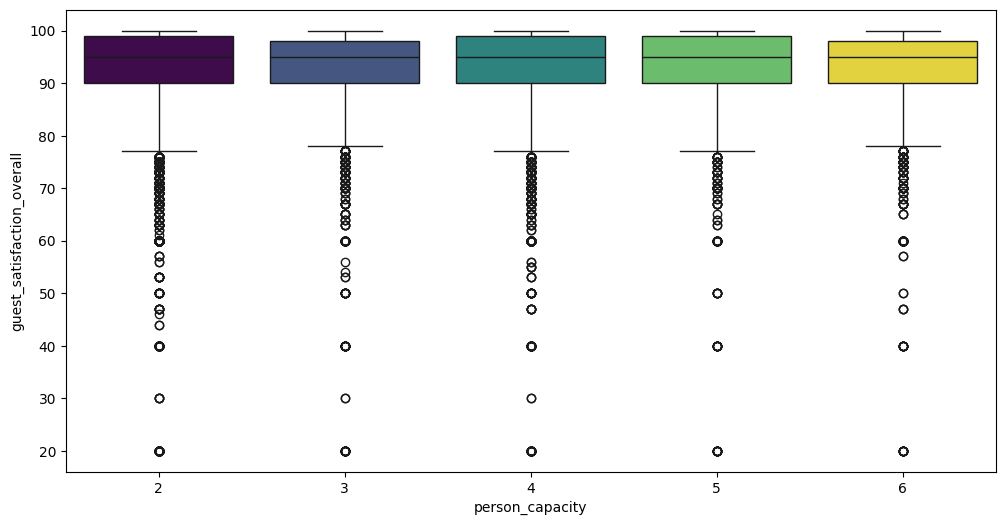

In [12]:
plt.figure(figsize=(12,6)) 
sns.boxplot(data=airbnb, x='person_capacity', y='guest_satisfaction_overall', palette="viridis", hue='person_capacity', legend=False);
#plt.savefig("../figures/bivariate_box_satisfaction_capacity.png", dpi=300, bbox_inches="tight")
plt.show()


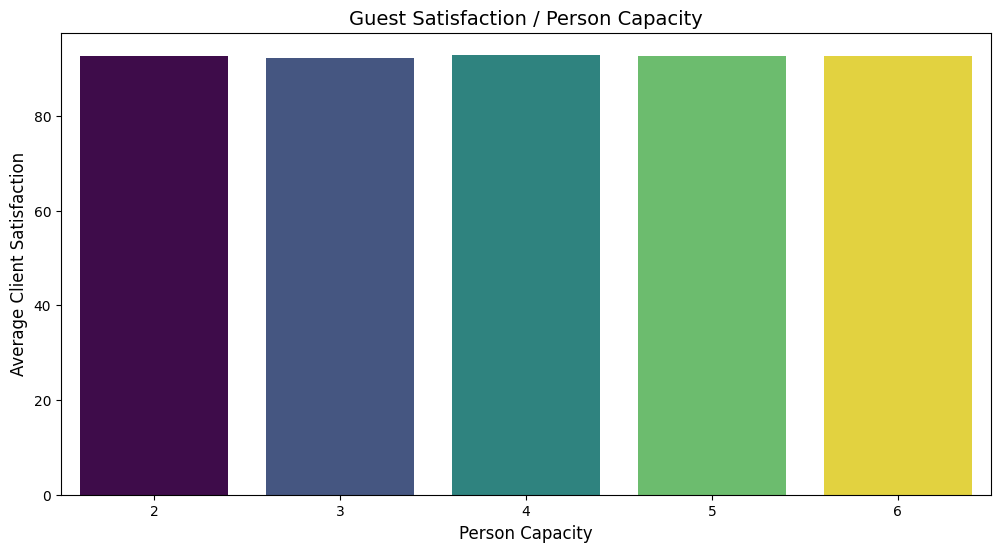

In [13]:
client_satisfaction_capacity = airbnb.groupby("person_capacity")[["guest_satisfaction_overall"]].mean()

plt.figure(figsize=(12,6))  
sns.barplot(data=client_satisfaction_capacity, x="person_capacity", y="guest_satisfaction_overall", hue = "person_capacity", palette="viridis")
plt.xlabel("Person Capacity", fontsize=12)
plt.ylabel("Average Client Satisfaction", fontsize=12)
plt.title("Guest Satisfaction / Person Capacity", fontsize=14)
plt.legend([],[], frameon=False)
#plt.savefig("../figures/bivariate_bar_satisfaction_capacity.png", dpi=300, bbox_inches="tight")
plt.show()


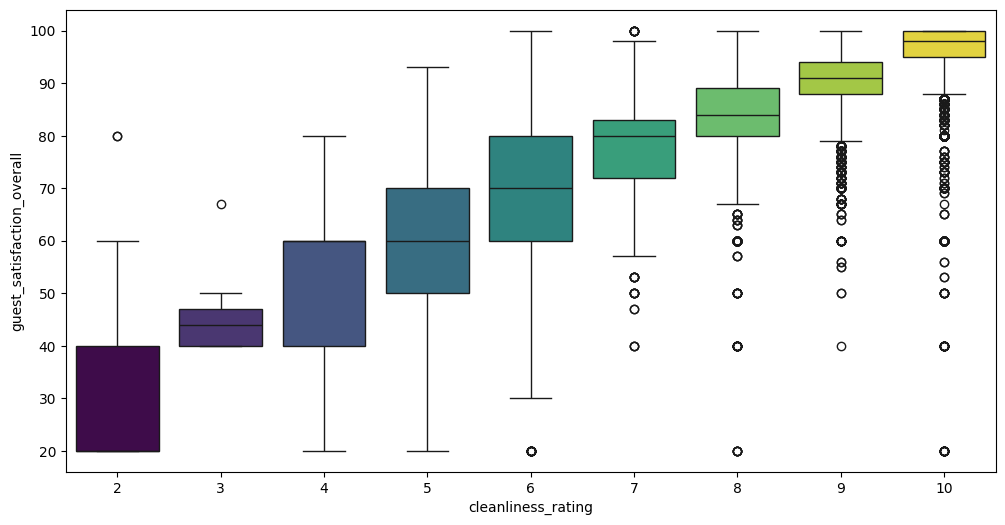

In [15]:
airbnb["cleanliness_rating"] = airbnb["cleanliness_rating"].astype(int)
plt.figure(figsize=(12,6)) 
sns.boxplot(data=airbnb, x='cleanliness_rating', y='guest_satisfaction_overall', palette="viridis", hue='cleanliness_rating', legend=False);
#plt.savefig("../figures/bivariate_box_satisfaction_cleanliness.png", dpi=300, bbox_inches="tight")
plt.show()


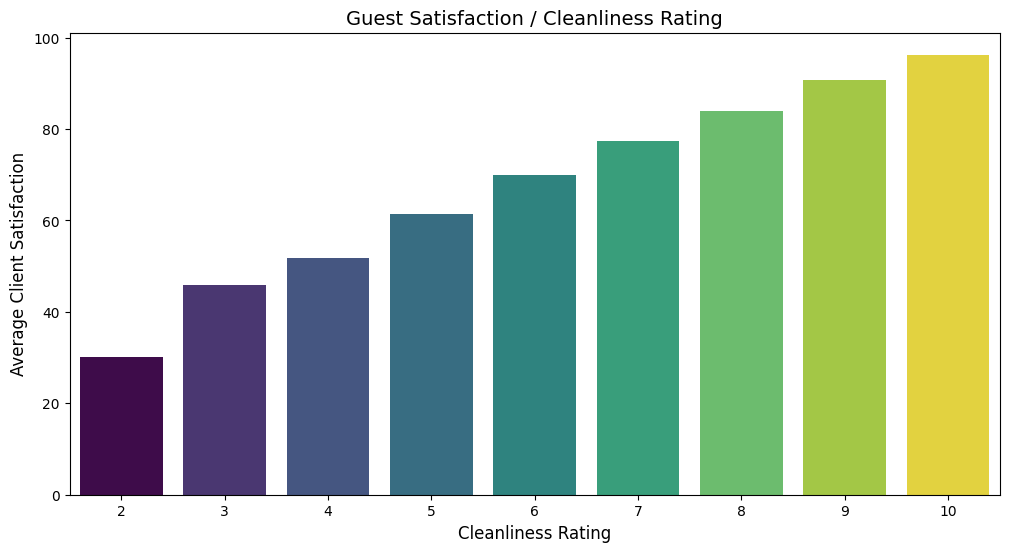

In [17]:
client_satisfaction_clean = airbnb.groupby("cleanliness_rating")[["guest_satisfaction_overall"]].mean()

plt.figure(figsize=(12,6))  
sns.barplot(data=client_satisfaction_clean, x="cleanliness_rating", y="guest_satisfaction_overall", hue = "cleanliness_rating", palette="viridis")
plt.xlabel("Cleanliness Rating", fontsize=12)
plt.ylabel("Average Client Satisfaction", fontsize=12)
plt.title("Guest Satisfaction / Cleanliness Rating", fontsize=14)
plt.legend([],[], frameon=False)
#plt.savefig("../figures/bivariate_bar_satisfaction_cleanliness.png", dpi=300, bbox_inches="tight")
plt.show()


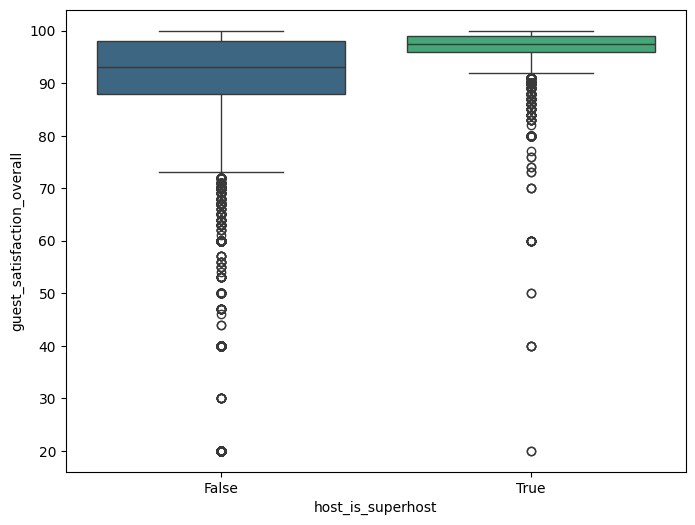

In [222]:
plt.figure(figsize=(8,6)) 
sns.boxplot(data=airbnb, x='host_is_superhost', y='guest_satisfaction_overall', palette="viridis", hue='host_is_superhost', legend=False);
#plt.savefig("../figures/bivariate_box_satisfaction_superhost.png", dpi=300, bbox_inches="tight")
plt.show()


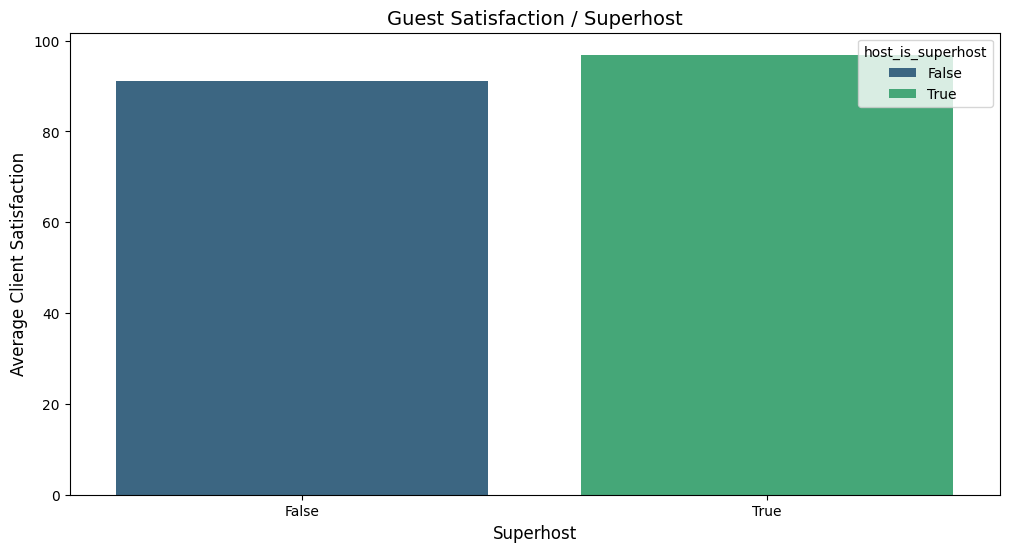

In [223]:
client_satisfaction_superhost = airbnb.groupby("host_is_superhost")[["guest_satisfaction_overall"]].mean()

plt.figure(figsize=(12,6))  
sns.barplot(data=client_satisfaction_superhost, x="host_is_superhost", y="guest_satisfaction_overall", hue = "host_is_superhost", palette="viridis")
plt.xlabel("Superhost", fontsize=12)
plt.ylabel("Average Client Satisfaction", fontsize=12)
plt.title("Guest Satisfaction / Superhost", fontsize=14)
#plt.savefig("../figures/bivariate_bar_satisfaction_superhost.png", dpi=300, bbox_inches="tight")
plt.show()


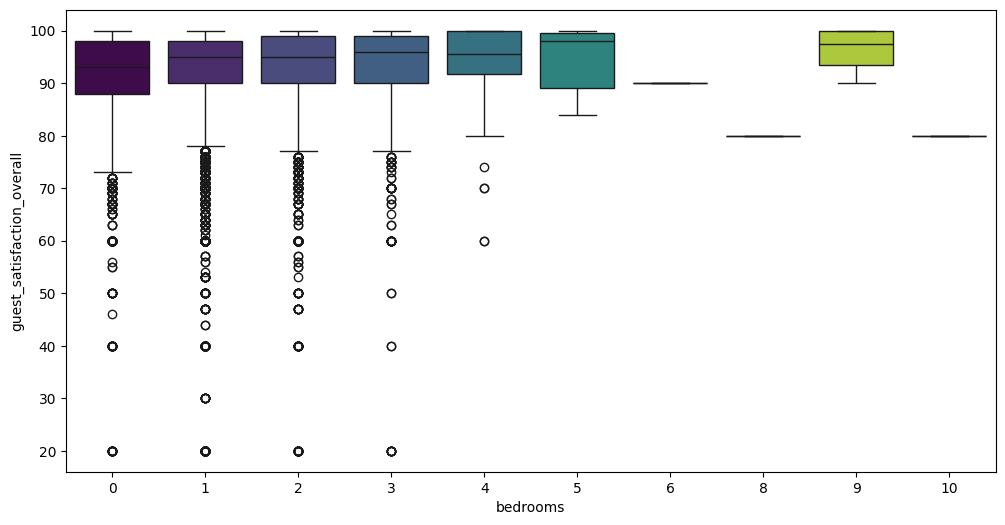

In [224]:
plt.figure(figsize=(12,6)) 
sns.boxplot(data=airbnb, x='bedrooms', y='guest_satisfaction_overall', palette="viridis", hue='bedrooms', legend=False);
#plt.savefig("../figures/bivariate_box_satisfaction_bedrooms.png", dpi=300, bbox_inches="tight")
plt.show()


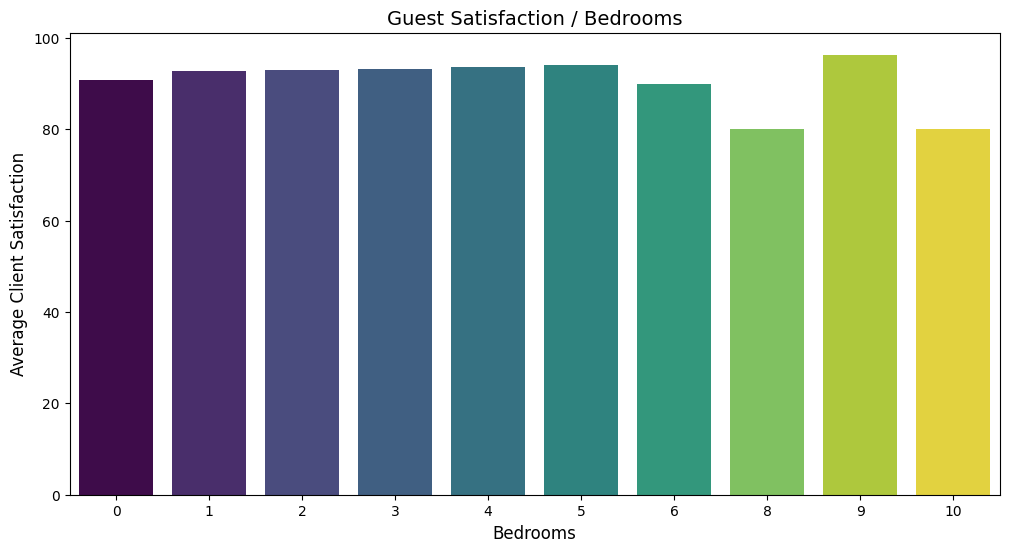

In [225]:
client_satisfaction_bedrooms = airbnb.groupby("bedrooms")[["guest_satisfaction_overall"]].mean()

plt.figure(figsize=(12,6))  
sns.barplot(data=client_satisfaction_bedrooms, x="bedrooms", y="guest_satisfaction_overall", hue = "bedrooms", palette="viridis")
plt.xlabel("Bedrooms", fontsize=12)
plt.ylabel("Average Client Satisfaction", fontsize=12)
plt.title("Guest Satisfaction / Bedrooms", fontsize=14)
plt.legend([],[], frameon=False)
#plt.savefig("../figures/bivariate_bar_satisfaction_bedrooms.png", dpi=300, bbox_inches="tight")
plt.show()


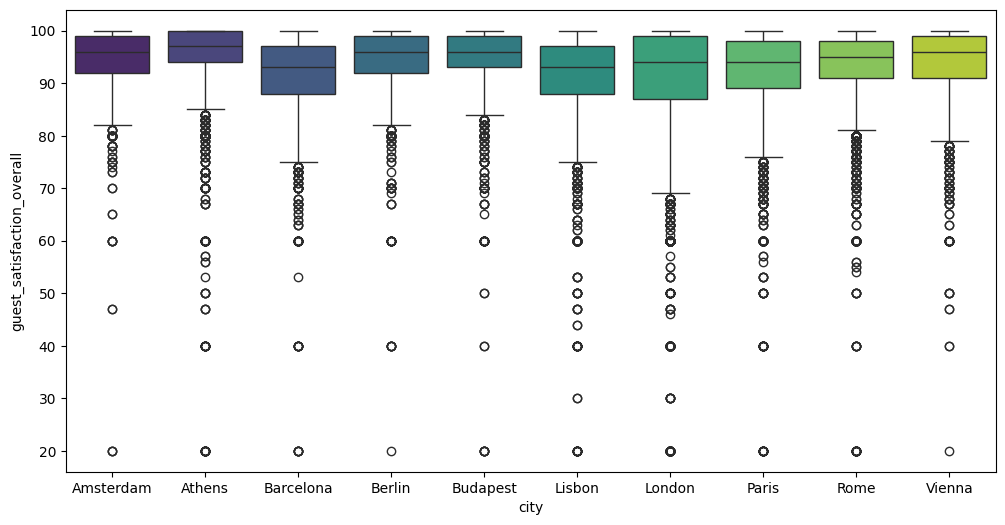

In [226]:
plt.figure(figsize=(12,6)) 
sns.boxplot(data=airbnb, x='city', y='guest_satisfaction_overall', palette="viridis", hue='city', legend=False);
#plt.savefig("../figures/bivariate_box_satisfaction_city.png", dpi=300, bbox_inches="tight")
plt.show()


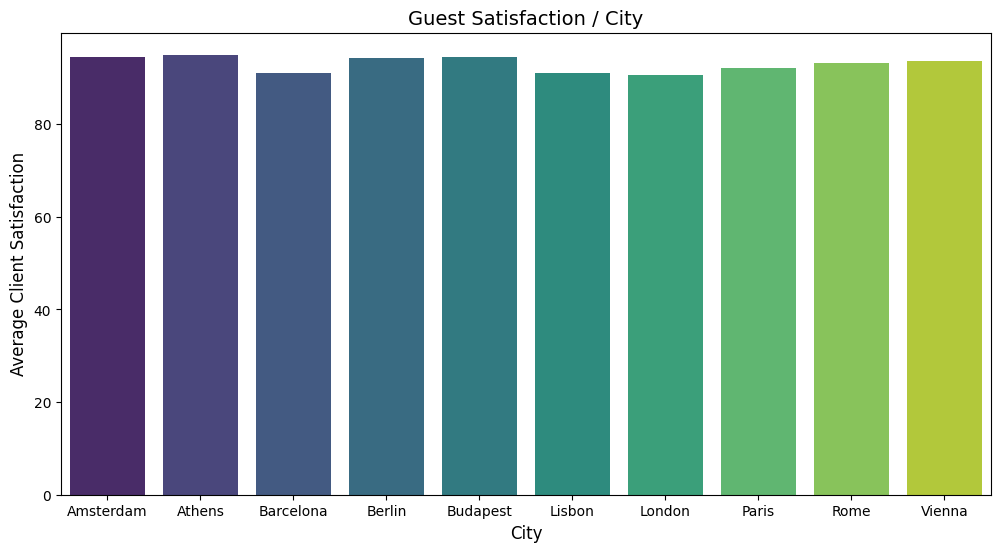

In [227]:
client_satisfaction_city = airbnb.groupby("city")[["guest_satisfaction_overall"]].mean()

plt.figure(figsize=(12,6))  
sns.barplot(data=client_satisfaction_city, x="city", y="guest_satisfaction_overall", hue = "city", palette="viridis")
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Client Satisfaction", fontsize=12)
plt.title("Guest Satisfaction / City", fontsize=14)
#plt.savefig("../figures/bivariate_bar_satisfaction_city.png", dpi=300, bbox_inches="tight")
plt.show()


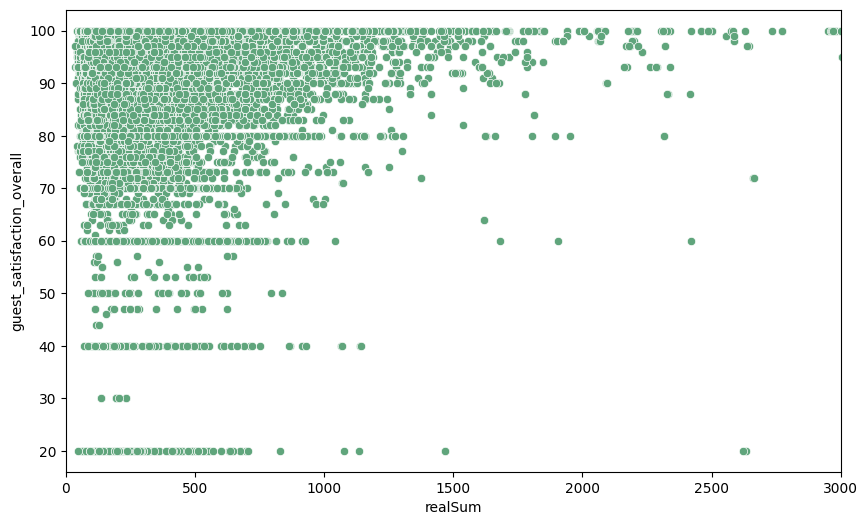

In [228]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=airbnb, x='realSum', y='guest_satisfaction_overall', color='#60a57c')

plt.xlim(0, 3000)
#plt.savefig("../figures/bivariate_scatter_satisfaction_realSum.png", dpi=300, bbox_inches="tight")
plt.show()


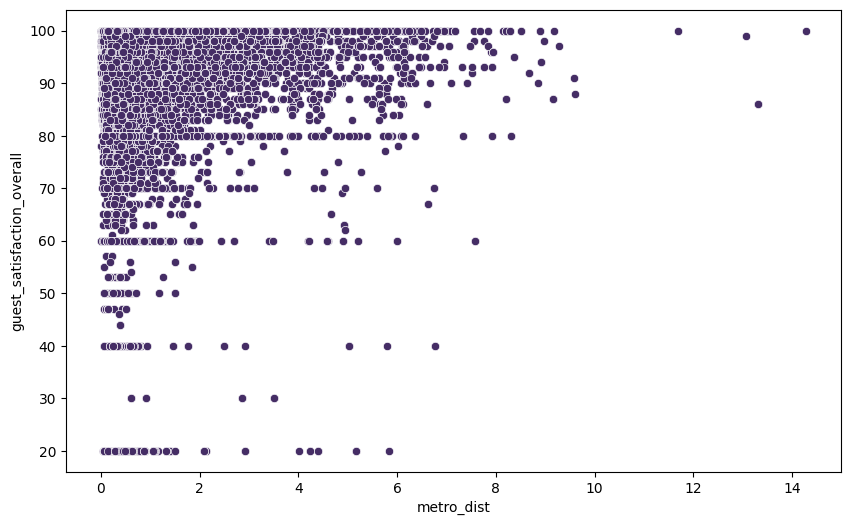

In [229]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=airbnb, x='metro_dist', y='guest_satisfaction_overall', color='#452d65')
#plt.savefig("../figures/bivariate_scatter_satisfaction_metrodist.png", dpi=300, bbox_inches="tight")
plt.show()


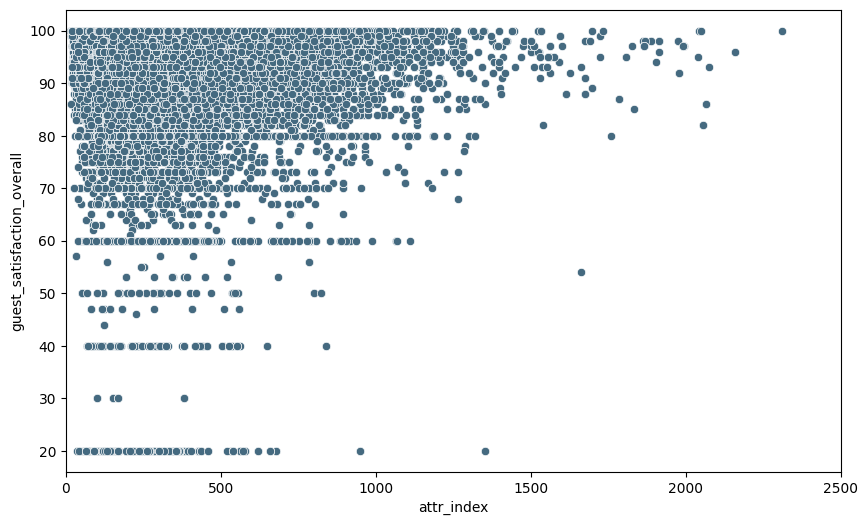

In [230]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=airbnb, x='attr_index', y='guest_satisfaction_overall', color='#456a80')

plt.xlim(0, 2500)
#plt.savefig("../figures/bivariate_scatter_satisfaction_attrindex.png", dpi=300, bbox_inches="tight")
plt.show()


## Correlation Matrix

In [231]:
numerical_columns = airbnb[["realSum" , "cleanliness_rating", "guest_satisfaction_overall", 
                            "dist", "metro_dist", "attr_index", "rest_index","person_capacity","bedrooms"]]

normalizer = MinMaxScaler()
num_norm = normalizer.fit_transform(numerical_columns)
df_norm = pd.DataFrame(num_norm, columns=numerical_columns.columns, index=airbnb.index)
df_norm

,realSum,cleanliness_rating,guest_satisfaction_overall,dist,metro_dist,attr_index,rest_index,person_capacity,bedrooms
0,0.008603,1.000,0.9125,0.198180,0.177775,0.014125,0.011784,0.0,0.1
1,0.016718,0.750,0.8125,0.018732,0.016614,0.136943,0.122473,0.5,0.1
2,0.012389,0.875,0.8375,0.226885,0.255711,0.013366,0.011355,0.0,0.1
3,0.021542,0.875,0.8750,0.014635,0.030661,0.106286,0.128128,0.5,0.2
4,0.024352,1.000,0.9750,0.020962,0.022170,0.119526,0.119182,0.0,0.1
...,...,...,...,...,...,...,...,...,...
51702,0.036798,1.000,1.0000,0.020386,0.009330,0.045405,0.062784,1.0,0.3
51703,0.014587,0.750,0.8250,0.031467,0.006905,0.042197,0.048319,0.0,0.1
51704,0.032543,1.000,0.9125,0.038743,0.014031,0.034217,0.039349,0.0,0.1
51705,0.014385,1.000,0.8375,0.119870,0.019980,0.020915,0.020817,0.0,0.1


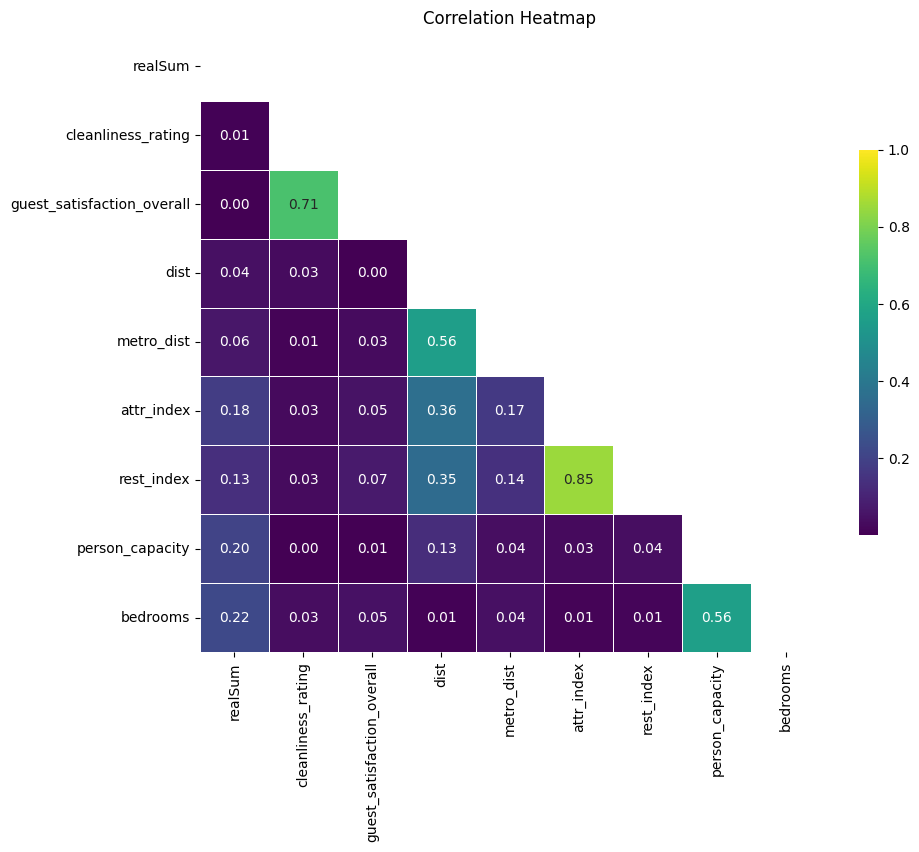

In [232]:
corr = np.abs(df_norm.corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=mask, cmap="viridis", vmax=1, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
#plt.savefig("../figures/correlation_half.png", dpi=300, bbox_inches="tight")
plt.show()



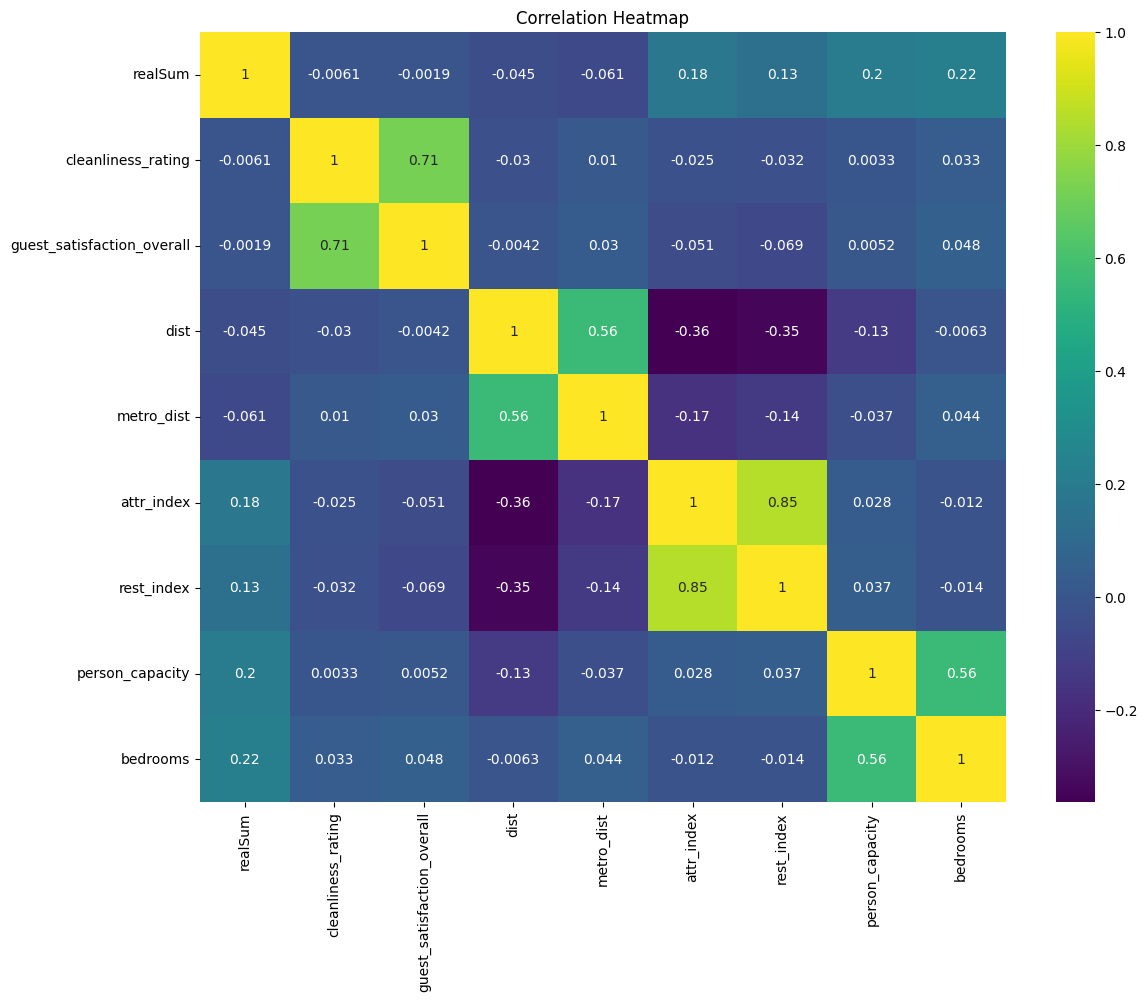

In [234]:
correlation_matrix = df_norm.corr()


plt.figure(figsize=(13, 10))


sns.heatmap(correlation_matrix, annot=True, cmap="viridis")

plt.title("Correlation Heatmap")
#plt.savefig("../figures/correlation_complete.png", dpi=300, bbox_inches="tight")
plt.show()
